In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset to inspect its structure
file_path = (r'C:\Users\Rony\Downloads\Dataset .csv')
data = pd.read_csv(file_path)

# Display basic information about the dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [7]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


##  Determine the Percentage of Restaurants That Offer Table Booking and Online Delivery

In [8]:
# Calculate percentage of restaurants offering table booking
table_booking_count = data['Has Table booking'].value_counts(normalize=True) * 100
print(f"Percentage of restaurants offering table booking:\n{table_booking_count}")

# Calculate percentage of restaurants offering online delivery
online_delivery_count = data['Has Online delivery'].value_counts(normalize=True) * 100
print(f"Percentage of restaurants offering online delivery:\n{online_delivery_count}")


Percentage of restaurants offering table booking:
No     87.875615
Yes    12.124385
Name: Has Table booking, dtype: float64
Percentage of restaurants offering online delivery:
No     74.337766
Yes    25.662234
Name: Has Online delivery, dtype: float64


Availability of online delivery among restaurants with different price ranges
Is delivering now          No       Yes
Price range                            
<500                99.834875  0.165125
500-1000            99.044309  0.955691
1000-2000           99.781897  0.218103
2000-3000          100.000000  0.000000
3000-5000          100.000000  0.000000
>5000              100.000000  0.000000


<Figure size 1000x600 with 0 Axes>

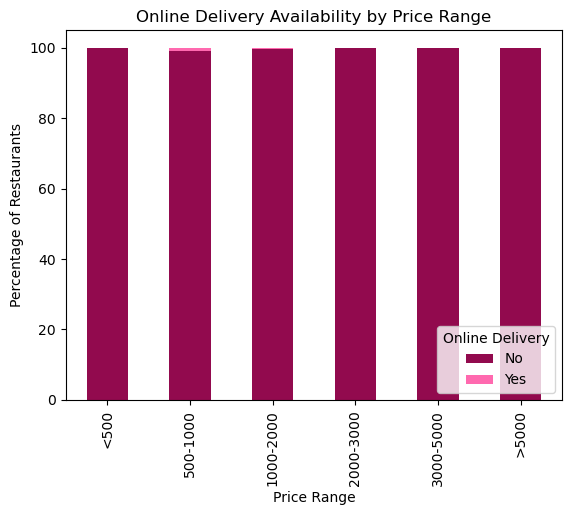

In [9]:


# Define bins and labels
bins = [0, 500, 1000, 2000, 3000, 5000, data['Average Cost for two'].max()]
labels = ['<500', '500-1000', '1000-2000', '2000-3000', '3000-5000', '>5000']

# Create price range categories
data['Price range'] = pd.cut(data['Average Cost for two'], bins=bins, labels=labels)

# Calculate online delivery availability by price range
online_delivery_by_price_range = data.groupby(['Price range', 'Is delivering now']).size().unstack(fill_value=0).apply(lambda x: x/x.sum()*100, axis=1)

# Display the results
print('Availability of online delivery among restaurants with different price ranges')
print(online_delivery_by_price_range)

# Visualization: Online Delivery by Price Range
plt.figure(figsize=(10, 6))
online_delivery_by_price_range.plot(kind='bar', stacked=True, color=['#920a4e', '#ff69af'])  # Adding two colors

plt.title('Online Delivery Availability by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Percentage of Restaurants')
plt.legend(title='Online Delivery', loc='lower right')
plt.show()


##  Analyze the Availability of Online Delivery Among Restaurants with Different Price Ranges

Online delivery availability by price range:
Has Online delivery          No        Yes
Price range                               
<500                  82.116909  17.883091
500-1000              54.908775  45.091225
1000-2000             65.866957  34.133043
2000-3000             88.961039  11.038961
3000-5000            100.000000   0.000000
>5000                100.000000   0.000000


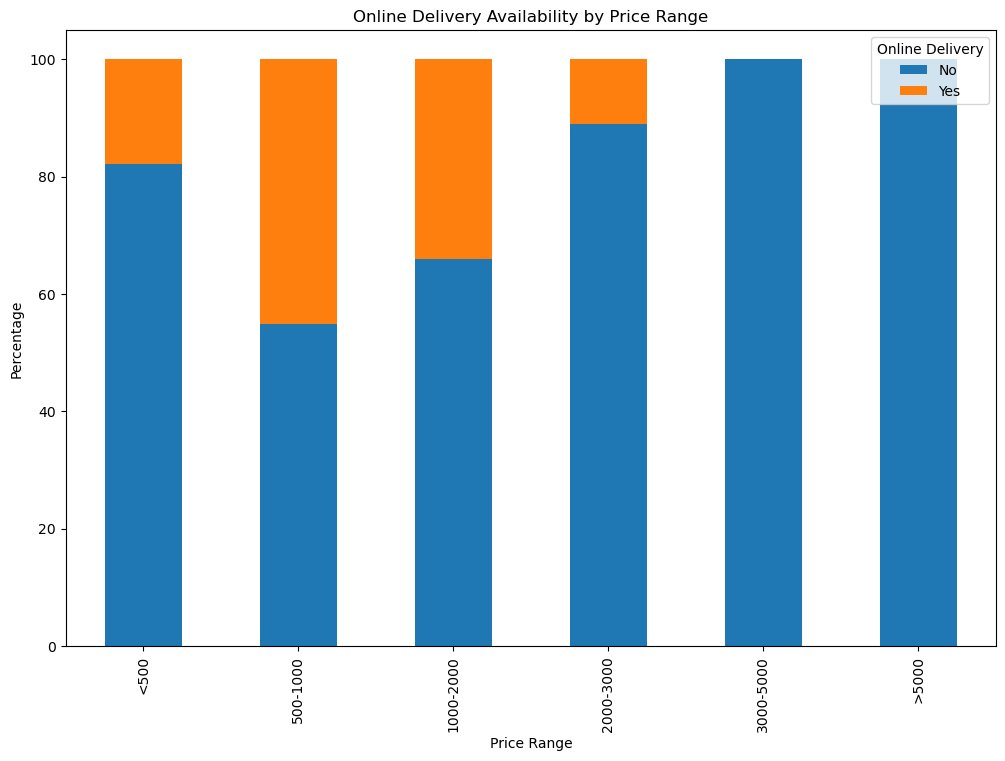

In [10]:
# Cross-tabulate online delivery availability and price ranges
online_delivery_price_range = pd.crosstab(data['Price range'], data['Has Online delivery'], normalize='index') * 100
print(f"Online delivery availability by price range:\n{online_delivery_price_range}")

# Visualize the analysis
online_delivery_price_range.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Online Delivery Availability by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Percentage')
plt.legend(title='Online Delivery', loc='upper right')
plt.show()
